<a href="https://colab.research.google.com/github/rixprakash/DS-4002/blob/main/hot-dog-survey-data/RixHotDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/rixprakash/DS-4002

Cloning into 'DS-4002'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 436 (delta 151), reused 75 (delta 75), pack-reused 263 (from 2)
Receiving objects: 100% (436/436), 383.86 KiB | 7.11 MiB/s, done.
Resolving deltas: 100% (246/246), done.


In [2]:
import pandas as pd
data = pd.read_csv('/content/DS-4002/hot-dog-survey-data/Hotdog Survey!(Sheet1).csv',encoding='latin-1')

Data Dictionary

The columns in the data set are: "Is a hotdog a sandwich?	Explain your answer. What year are you? Where are you from?"

The first column consists of yes and no's, the second column consists of all strings to explain their reasoning, the third column consists of what year the student is, and the last column is the where each person is from.

In [3]:
data.head()

,Id,Start time,Completion time,Email,Name,Is a hotdog a sandwich?,Explain your answer.,What year are you?,Where are you from?
0,1,1/16/2025 12:02,1/16/2025 12:02,anonymous,NaN,No,its just not,Fourth-Year,nova
1,2,1/16/2025 12:02,1/16/2025 12:03,anonymous,NaN,No,NaN,Fourth-Year,NaN
2,3,1/16/2025 12:02,1/16/2025 12:03,anonymous,NaN,No,"The bread is connected for a hot dog, while a ...",Fourth-Year,Northern Virginia
3,4,1/16/2025 12:02,1/16/2025 12:03,anonymous,NaN,No,A hot dog is a hot dog with or without the bre...,Fourth-Year,NoVa
4,5,1/16/2025 12:03,1/16/2025 12:04,anonymous,NaN,No,The definition of a sandwich involves TWO piec...,Fourth-Year,"Houston, Texas"


In [4]:
datacleaned = data.drop(['Email', 'Name'], axis=1)
datacleaned.head()

,Id,Start time,Completion time,Is a hotdog a sandwich?,Explain your answer.,What year are you?,Where are you from?
0,1,1/16/2025 12:02,1/16/2025 12:02,No,its just not,Fourth-Year,nova
1,2,1/16/2025 12:02,1/16/2025 12:03,No,NaN,Fourth-Year,NaN
2,3,1/16/2025 12:02,1/16/2025 12:03,No,"The bread is connected for a hot dog, while a ...",Fourth-Year,Northern Virginia
3,4,1/16/2025 12:02,1/16/2025 12:03,No,A hot dog is a hot dog with or without the bre...,Fourth-Year,NoVa
4,5,1/16/2025 12:03,1/16/2025 12:04,No,The definition of a sandwich involves TWO piec...,Fourth-Year,"Houston, Texas"


In [5]:
import pandas as pd
datacleaned['Start time'] = pd.to_datetime(datacleaned['Start time'])
datacleaned['date'] = datacleaned['Start time'].dt.date
datacleaned['time'] = datacleaned['Start time'].dt.time
datacleaned['month'] = datacleaned['Start time'].dt.month
datacleaned['day'] = datacleaned['Start time'].dt.day
datacleaned = datacleaned.drop(['Start time'], axis=1)
datacleaned.head()


,Id,Completion time,Is a hotdog a sandwich?,Explain your answer.,What year are you?,Where are you from?,date,time,month,day
0,1,1/16/2025 12:02,No,its just not,Fourth-Year,nova,2025-01-16,12:02:00,1,16
1,2,1/16/2025 12:03,No,NaN,Fourth-Year,NaN,2025-01-16,12:02:00,1,16
2,3,1/16/2025 12:03,No,"The bread is connected for a hot dog, while a ...",Fourth-Year,Northern Virginia,2025-01-16,12:02:00,1,16
3,4,1/16/2025 12:03,No,A hot dog is a hot dog with or without the bre...,Fourth-Year,NoVa,2025-01-16,12:02:00,1,16
4,5,1/16/2025 12:04,No,The definition of a sandwich involves TWO piec...,Fourth-Year,"Houston, Texas",2025-01-16,12:03:00,1,16


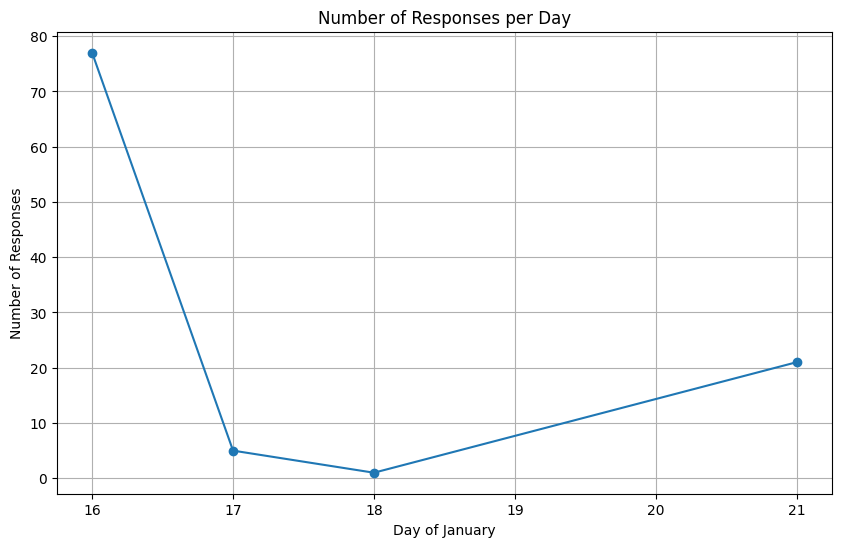

In [6]:
import matplotlib.pyplot as plt
day_counts = datacleaned['day'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(day_counts.index, day_counts.values, marker='o', linestyle='-')
plt.xlabel('Day of January')
plt.ylabel('Number of Responses')
plt.title('Number of Responses per Day')
plt.grid(True)
plt.show()

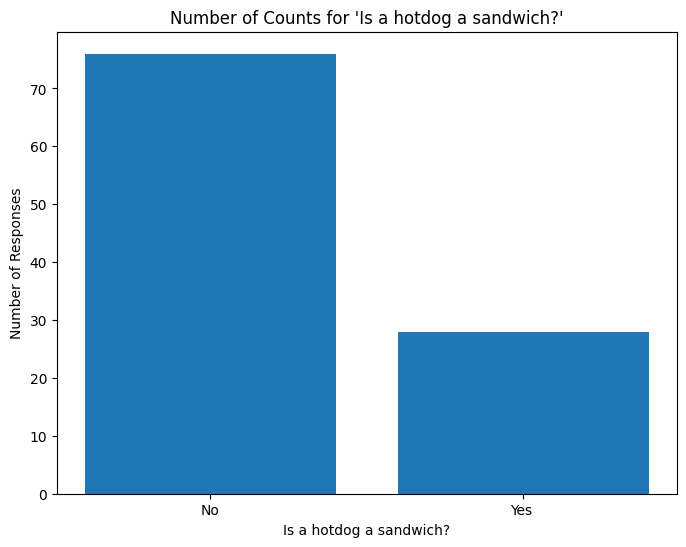

In [ ]:
hotdog_counts = datacleaned['Is a hotdog a sandwich?'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(hotdog_counts.index, hotdog_counts.values)
plt.xlabel("Is a hotdog a sandwich?")
plt.ylabel("Number of Responses")
plt.title("Number of Counts for 'Is a hotdog a sandwich?'")
plt.show()

Selection Bias
The survey only includes responses from our data science class, which might not be representative of the broader student population or general public. This may include factors like age, major, gender, cultural background, and dietary preferences. For instance, the proportion of international students in this class vs. general student population could prove important, as their preferences and perception of sandwiches may differ from local students. This means the results may not be generalizable beyond our data science classroom.

Response Bias
People more interested in hotdogs or those with strong opinions might be more likely to participate, while others might not have taken the pole as seriously.

Small Sample size
There are a limited number of responses from our class, meaning there is increased uncertainty and lower statistical validity.

Based on the Survey Data, the greatest number of students answered the survery on January 16th and the fewest on the 17th. Response numbers increased to its second highest peak on the 21st.

Overall, the majority of students voted that hotdogs were not a sandwich.